In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        next(training_file)
        row = training_file.readline().rstrip('\n')
        
#         labels_arr = np.array[]
#         images_arr = [[]]
        
       
#         print(row)
            
#         row = training_file.readline().rstrip('\n')
#         items = row.split(",")
#         l = items[0]
#         im = items[1:]
        
#         print(type(im[0]))
#         i = [float(i) for i in im]
        
#         print(type(i[0]))
#         print(len(l))
#         print(len(i))
#         print(len(items))
#         print(type(items[0]))
#         print(l)
#         print(i[783])
        
#         labels_arr.append(l)
#         images_arr.append(i)
        
#         print(labels_arr)
#         print(images_arr)
        
    
        labels_arr = []
        images_arr = []
        
        
        while row:
            
            items = row.split(",")
            label = int(items[0])  
            img = items[1:]

            image = [float(i) for i in img]
            
            labels_arr.append(label)
            images_arr.append(image)

            row = training_file.readline().rstrip('\n')
        

#         print(len(labels_arr))
#         print(len(images_arr))
        
#         print(labels_arr[0])
#         print(images_arr[7171])
        
        
        labels = np.array(labels_arr)
        images = np.reshape(images_arr, (-1, 28, 28))
        
#         print(labels.shape)
#         print(images.shape)
        
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)


# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images[..., np.newaxis]
# np.expand_dims(training_images, axis=0)
# Your Code Here
testing_images = testing_images[..., np.newaxis]
# np.expand_dims(testing_images, axis=0)
# Your Code Here




# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255
    )

train_generator = train_datagen.flow(
    (training_images, training_labels) 
)

validation_generator = validation_datagen.flow(
    (testing_images, testing_labels) 
)





# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
    ])

# Compile Model. 
model.compile(# Your Code Here
        loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']
    )

# Train the Model
history = model.fit_generator(# Your Code Here (set 'epochs' = 2)
            train_datagen.flow(training_images, training_labels, batch_size=20),
#                     steps_per_epoch= 1372,
#         validation_datagen.flow(testing_images, testing_labels, batch_size=20),
                    epochs=2,
            validation_data=(testing_images,testing_labels)
#            train_generator, epochs=2, validation_data = validation_generator, verbose = 1
    )

model.evaluate(testing_images, testing_labels, verbose=1)

Epoch 1/2
1373/1373 [==============================] - 167s 121ms/step - loss: 2.5308 - accuracy: 0.2134 - val_loss: 12.5231 - val_accuracy: 0.2178
Epoch 2/2
1373/1373 [==============================] - 166s 121ms/step - loss: 1.5597 - accuracy: 0.4875 - val_loss: 7.2286 - val_accuracy: 0.5450
7172/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[168.6825807808633, 0.54503626]

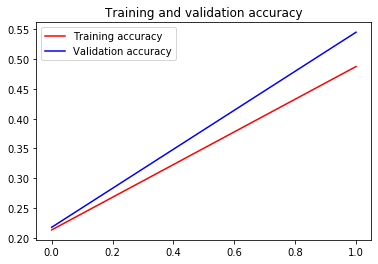

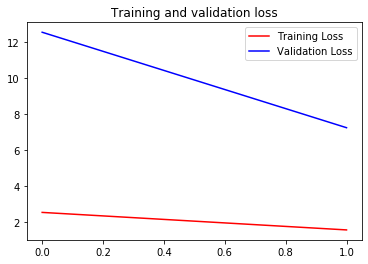

In [9]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
# acc = # Your Code Here
# val_acc = # Your Code Here
# loss = # Your Code Here
# val_loss = # Your Code Here

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);